## Nafiz Emir Eğilli - FERM 515 – Fixed Income in Emerging Markets - Homework 1

#### 1. (30 pts) Calculate the requested measures for bonds A and B (assume that each bond pays interest semiannually):

## 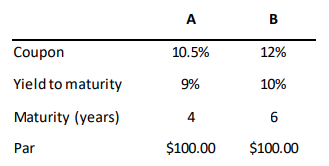

#### a) Price value of a basis point (DV01)
#### b) Macaulay duration
#### c) Modified duration
#### d) Convexity measure

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
# Function for bond pricing
def bond_price(face_value, maturity, coupon_rate, coupon_freq, ytm):
    coupon_payment = face_value * coupon_rate / coupon_freq
    periods = np.arange(1, maturity * coupon_freq + 1)
    price = np.sum(coupon_payment / (1 + ytm / coupon_freq) ** periods) + face_value / (1 + ytm / coupon_freq) ** (maturity * coupon_freq)
    return price

# Function for Price value of a basis point (DV01)
def dv01(face_value, maturity, coupon_rate, coupon_freq, ytm, price=None):
    if price is None:
        price = bond_price(face_value, maturity, coupon_rate, coupon_freq, ytm)
    price_up = bond_price(face_value, maturity, coupon_rate, coupon_freq, ytm + 0.0001)
    return (price - price_up)

# Function for Macaulay Duration
def macaulay_duration(price, face_value, maturity, coupon_rate, coupon_freq, ytm):
    coupon_payment = face_value * coupon_rate / coupon_freq
    periods = np.arange(1, maturity * coupon_freq + 1)
    cash_flows = np.full(maturity * coupon_freq, coupon_payment)
    cash_flows[-1] += face_value
    duration = np.sum(periods * cash_flows / (1 + ytm / coupon_freq) ** periods) / price
    return duration / coupon_freq

# Function for Modified Duration
def modified_duration(macaulay_dur, ytm, coupon_freq):
    return macaulay_dur / (1 + ytm / coupon_freq)

# Function for Convexity
def bond_convexity(face_value, maturity, coupon_rate, coupon_freq, ytm):
    coupon_payment = face_value * coupon_rate / coupon_freq
    periods = np.arange(1, maturity * coupon_freq + 1)
    cash_flows = np.full(maturity * coupon_freq, coupon_payment)
    cash_flows[-1] += face_value
    discount_factors = (1 + ytm / coupon_freq) ** periods
    discounted_cash_flows = cash_flows / discount_factors
    bond_price = np.sum(discounted_cash_flows)
    convexity_contributions = periods * (periods + 1) * discounted_cash_flows
    convexity = np.sum(convexity_contributions) / (bond_price * (1 + ytm / coupon_freq) ** 2)
    return convexity / (coupon_freq ** 2)    

In [3]:
# Bond A
face_value = 100
maturity_A = 4
coupon_rate_A = 0.105
coupon_freq = 2
ytm_A = 0.09

price_A = bond_price(face_value, maturity_A, coupon_rate_A, coupon_freq, ytm_A)
macaulay_dur_A = macaulay_duration(price_A, face_value, maturity_A, coupon_rate_A, coupon_freq, ytm_A)
modified_dur_A = modified_duration(macaulay_dur_A, ytm_A, coupon_freq)
convexity_A = bond_convexity(face_value, maturity_A, coupon_rate_A, coupon_freq, ytm_A)
dv01_A = dv01(face_value, maturity_A, coupon_rate_A, coupon_freq, ytm_A, price_A)

# Bond B
maturity_B = 6
coupon_rate_B = 0.12
ytm_B = 0.10

price_B = bond_price(face_value, maturity_B, coupon_rate_B, coupon_freq, ytm_B)
macaulay_dur_B = macaulay_duration(price_B, face_value, maturity_B, coupon_rate_B, coupon_freq, ytm_B)
modified_dur_B = modified_duration(macaulay_dur_B, ytm_B, coupon_freq)
convexity_B = bond_convexity(face_value, maturity_B, coupon_rate_B, coupon_freq, ytm_B)
dv01_B = dv01(face_value, maturity_B, coupon_rate_B, coupon_freq, ytm_B, price_B)

In [4]:
# Outputs for Bond A
print("Bond A:")
print("Price: ${:.2f}".format(price_A))
print("DV01 (Price Value of a Basis Point): {:.8f}".format(dv01_A))
print("Macaulay Duration: {:.2f} years".format(macaulay_dur_A))
print("Modified Duration: {:.2f} years".format(modified_dur_A))
print("Convexity Measure: {:.2f}".format(convexity_A))

# Outputs for Bond B
print("\nBond B:")
print("Price: ${:.2f}".format(price_B))
print("DV01 (Price Value of a Basis Point): {:.8f}".format(dv01_B))
print("Macaulay Duration: {:.2f} years".format(macaulay_dur_B))
print("Modified Duration: {:.2f} years".format(modified_dur_B))
print("Convexity Measure: {:.2f}".format(convexity_B))

Bond A:
Price: $104.95
DV01 (Price Value of a Basis Point): 0.03398308
Macaulay Duration: 3.38 years
Modified Duration: 3.24 years
Convexity Measure: 13.14

Bond B:
Price: $108.86
DV01 (Price Value of a Basis Point): 0.04680263
Macaulay Duration: 4.52 years
Modified Duration: 4.30 years
Convexity Measure: 23.93


#### 2. (20 pts) Choose one of the bonds in question 1 (A or B), answer the following questions:
#### a) What isthe percent price change in the bond if YTM rises 100 bps?
#### b) If you approximate the price change by only using the duration of the bond, what is the difference between the duration approach and actual price change?
#### c) If you use both the duration and the convexity of the bond, does error term gets lower?
#### d) Check the effect of yield level on the convexity of the bond. Plot the yield-convexity relationship by changing the yield to maturity. Discuss your result.


In [5]:
### We choose Bond A to proceed

# Updated bond price calculation for new YTM
new_ytm = 0.10  # YTM rises by 100 bps

# Calculate the new price with increased YTM
price_new_ytm = bond_price(face_value, maturity_A, coupon_rate_A, coupon_freq, new_ytm)

# a) Percent price change calculation
percent_price_change = ((price_new_ytm - price_A) / price_A) * 100

# b) Price change approximation using duration
approx_price_change_dur = -modified_dur_A * 0.01 * price_A  # 1% increase in yield
percent_approx_change_dur = (approx_price_change_dur / price_A) * 100
difference_actual_approx = percent_price_change - percent_approx_change_dur

# c) Price change using duration and convexity
approx_price_change_convexity = approx_price_change_dur + 0.5 * convexity_A * (0.01 ** 2) * price_A
percent_approx_change_convexity = (approx_price_change_convexity / price_A) * 100
error_term_reduction = percent_price_change - percent_approx_change_convexity

# d) Yield-Convexity relationship
yields = np.linspace(0.07, 0.12, 6)
convexities = [bond_convexity(face_value, maturity_A, coupon_rate_A, coupon_freq, y) for y in yields]

Answers for Bond A:

a) Percent price change if YTM rises 100 bps: -3.17%
b) Actual price change: -3.17%
   Approximate price change using duration: -3.24%
   Difference between actual and approximate change: 0.06%
c) Approximate price change using duration and convexity: -3.17%
   Reduction in error term when including convexity: -0.00%
d) Yield-Convexity relationship:


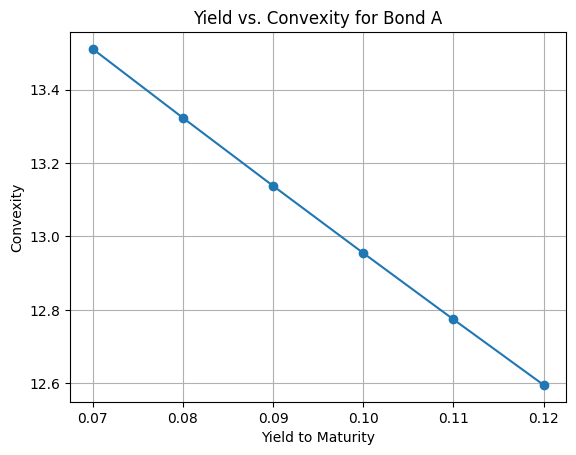

In [6]:
print("Answers for Bond A:\n")

# a) What is the percent price change in the bond if YTM rises 100 bps?
print("a) Percent price change if YTM rises 100 bps: {:.2f}%".format(percent_price_change))

# b) Difference between the duration approach and actual price change
print("b) Actual price change: {:.2f}%".format(percent_price_change))
print("   Approximate price change using duration: {:.2f}%".format(percent_approx_change_dur))
print("   Difference between actual and approximate change: {:.2f}%".format(difference_actual_approx))

# c) Does error term get lower when using both duration and convexity?
print("c) Approximate price change using duration and convexity: {:.2f}%".format(percent_approx_change_convexity))
print("   Reduction in error term when including convexity: {:.2f}%".format(error_term_reduction))

# d) Yield-Convexity relationship
print("d) Yield-Convexity relationship:")
yields = np.linspace(0.07, 0.12, 6)
convexities = [bond_convexity(face_value, maturity_A, coupon_rate_A, coupon_freq, y) for y in yields]
plt.plot(yields, convexities, marker='o')
plt.xlabel('Yield to Maturity')
plt.ylabel('Convexity')
plt.title('Yield vs. Convexity for Bond A')
plt.grid(True)
plt.show()

So, we can observe that if the yield increases, convexity of the bond decreases.

#### 3. (50 pts) Consider following bonds where 0.5- and 1-year securities are zero-coupon instruments and others are coupon bonds. (Payments are semi-annual)

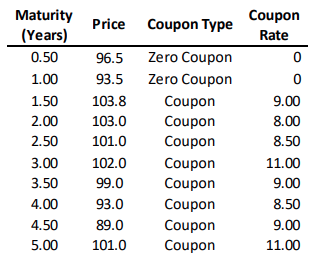

#### a) Calculate the spot rates (Estimate the term structure using bootstrappingmethod).
#### b) Compute the 6-month forward rates.
#### c) Plot the spot rate curve and 6-month forward rate curve in a single chart.
#### d) Estimate Nelson-Siegel (NS) parameters (B0, B1, B2, tau) using the spot rate term structure. Report the parameters and show the yield-curve. Functional form of NS is: 
$ R(m) = \beta_0 + \beta_1 \left[ \frac{1 - \exp(-m/\tau)}{m/\tau} \right] + \beta_2 \left[ \frac{1 - \exp(-m/\tau)}{m/\tau} - \exp(-m/\tau) \right] $
#### where m is time to maturity.

In [30]:
# Bond data
bonds = pd.DataFrame({
    'Maturity': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
    'Price': [96.5, 93.5, 103.8, 103.0, 101.0, 102.0, 99.0, 93.0, 89.0, 101.0],
    'Coupon Rate': [0, 0, 9, 8, 8.5, 11, 9, 8.5, 9, 11],
    'Coupon Type': ['Zero', 'Zero', 'Coupon', 'Coupon', 'Coupon', 'Coupon', 'Coupon', 'Coupon', 'Coupon', 'Coupon']
})

# Define semiannual payments
bonds['Coupon'] = bonds['Coupon Rate'] / 100 * 100 / 2  # Assuming par value is 100

In [31]:
# Bootstrapping spot rates
def bootstrap_spot_rates(bonds):
    spots = np.zeros(len(bonds))
    for i in range(len(bonds)):
        if bonds['Coupon Type'].iloc[i] == 'Zero':
            # Zero-coupon bond formula
            spots[i] = -np.log(bonds['Price'].iloc[i] / 100) / bonds['Maturity'].iloc[i]
        else:
            # Coupon bond, solve for the spot rate iteratively
            times = np.arange(0.5, bonds['Maturity'].iloc[i] + 0.5, 0.5)
            cash_flows = np.full(len(times), bonds['Coupon'].iloc[i])
            cash_flows[-1] += 100  # Add the par value to the last cash flow
            def price_error(spot):
                # Calculate the present value of cash flows
                discounted_cf = cash_flows / (1 + spot / 2) ** (times * 2)
                return (np.sum(discounted_cf) - bonds['Price'].iloc[i]) ** 2
            result = minimize(price_error, spots[max(i-1, 0)], method='BFGS')
            spots[i] = result.x[0]
    return spots

spots = bootstrap_spot_rates(bonds)
spots

array([0.07125436, 0.06720875, 0.0630528 , 0.06378526, 0.08050427,
       0.1020929 , 0.09341526, 0.10696709, 0.12252268, 0.10736339])

Calculated 6-month forward rates:
From 0.5 to 1.0 year: 6.32%
From 1.0 to 1.5 year: 5.48%
From 1.5 to 2.0 year: 6.60%
From 2.0 to 2.5 year: 15.00%
From 2.5 to 3.0 year: 21.67%
From 3.0 to 3.5 year: 4.28%
From 3.5 to 4.0 year: 20.67%
From 4.0 to 4.5 year: 25.51%
From 4.5 to 5.0 year: -2.02%


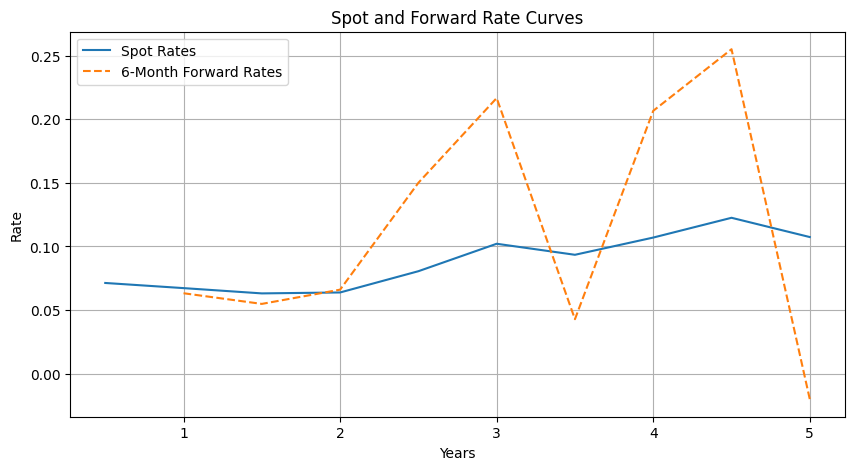

In [32]:
## Step 3: Compute forward rates
def compute_forward_rates(spots, intervals):
    forwards = np.zeros(len(spots) - 1)
    for i in range(len(forwards)):
        forwards[i] = ((1 + spots[i+1]) ** (i+2) / (1 + spots[i]) ** (i+1)) - 1
    return forwards

forwards = compute_forward_rates(spots, 0.5)

print("Calculated 6-month forward rates:")
for i, rate in enumerate(forwards):
    print(f"From {bonds['Maturity'].iloc[i]} to {bonds['Maturity'].iloc[i+1]} year: {rate*100:.2f}%")

### Step 4: Plot the spot rate curve and 6-month forward rate curve
plt.figure(figsize=(10, 5))
plt.plot(bonds['Maturity'], spots, label='Spot Rates')
plt.plot(bonds['Maturity'][:-1] + 0.5, forwards, label='6-Month Forward Rates', linestyle='--')
plt.xlabel('Years')
plt.ylabel('Rate')
plt.title('Spot and Forward Rate Curves')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
### Step 5: Estimate Nelson-Siegel parameters
def nelson_siegel(m, beta0, beta1, beta2, tau):
    return beta0 + beta1 * (1 - np.exp(-m / tau)) / (m / tau) + beta2 * ((1 - np.exp(-m / tau)) / (m / tau) - np.exp(-m / tau))

def ns_error(params, maturities, observed_rates):
    beta0, beta1, beta2, tau = params
    predicted_rates = nelson_siegel(maturities, beta0, beta1, beta2, tau)
    return np.sum((predicted_rates - observed_rates) ** 2)

initial_guess = [0.05, -0.02, 0.01, 1.0]
result = minimize(ns_error, initial_guess, args=(bonds['Maturity'], spots), method='L-BFGS-B')
beta0, beta1, beta2, tau = result.x

Nelson-Siegel Parameters:
Beta0: 0.1661918254986914
Beta1: -0.04928421754034074
Beta2: -0.268841857410663
Tau: 0.7802850284911477


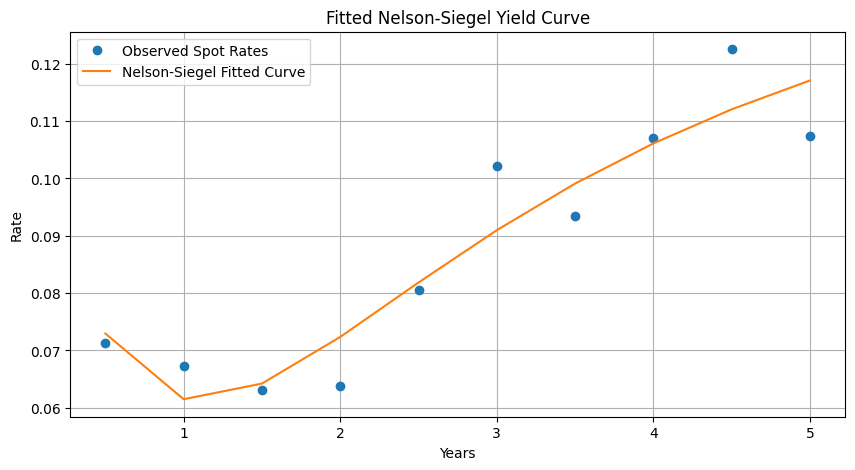

In [34]:
# Report Nelson-Siegel parameters
print("Nelson-Siegel Parameters:")
print("Beta0:", beta0)
print("Beta1:", beta1)
print("Beta2:", beta2)
print("Tau:", tau)

# Plot the estimated yield curve
predicted_curve = nelson_siegel(bonds['Maturity'], beta0, beta1, beta2, tau)
plt.figure(figsize=(10, 5))
plt.plot(bonds['Maturity'], spots, 'o', label='Observed Spot Rates')
plt.plot(bonds['Maturity'], predicted_curve, label='Nelson-Siegel Fitted Curve')
plt.xlabel('Years')
plt.ylabel('Rate')
plt.title('Fitted Nelson-Siegel Yield Curve')
plt.legend()
plt.grid(True)
plt.show()